# Predicting Heart Disease Using ML

Using various Python-based ML and data science libraries to build an ML model capable of detecting heart disease using the provided data

Approaches:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given the data of the patient, can we predict whether the patient has heart disease or not

## 2. Data

Data acquired from https://www.kaggle.com/ronitf/heart-disease-uci
Also available here https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation 

> The goal is to achieve 95% accuracy in order to continue pursue the project

## 4. Features

Features in the dataset consists of:

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
  * 0: typical angina
  * 1: atypical angina
  * 2: non-anginal pain
  * 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
  * 0: normal
  * 1: having ST-T wave abnormality (T wave inversions and/or ST   elevation or depression of > 0.05 mV)
  * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
  * 1: upsloping
  * 2: flat
  * 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: diagnosis of heart disease (angiographic disease status)
  * 0: < 50% diameter narrowing
  * 1: > 50% diameter narrowing

## Preparing The Tools

In [1]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Importing models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing model evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration

Explore the dataset further to know more about the data (e.g number of data, data types, etc)

1. What are we trying to solve?
2. What are the datatypes available and how are we going to treat it?
3. Is there any null values and how are we going to handle it?
4. Any outliers?
5. Are we going to add, change, or remove the data to get the most out of it?

In [4]:
df.shape

(303, 14)

In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
## Number of each class of the target variable

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

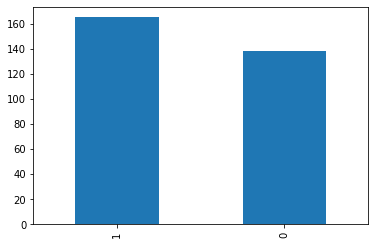

In [12]:
df["target"].value_counts().plot(kind="bar");

In [14]:
## Find out about the datatypes and whether there is any null values or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency According to Sex

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
## Compare target with sex

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


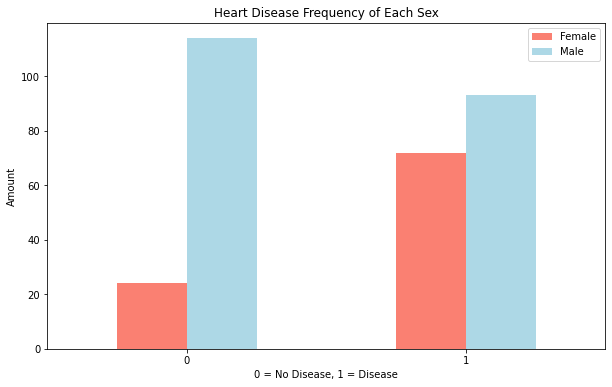

In [26]:
## Plot the comparison

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency of Each Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate

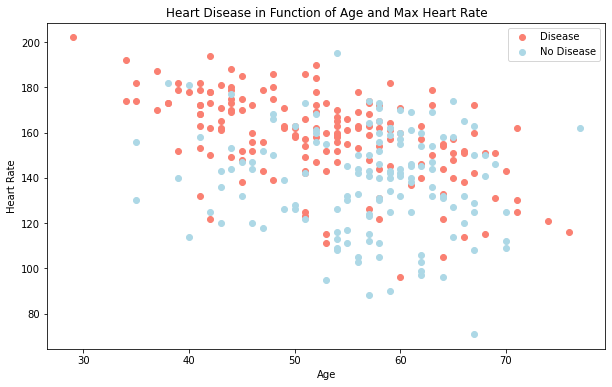

In [35]:
## Create figure

plt.figure(figsize=(10, 6))

## Scatter with positive examples

plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1],
            c="salmon")

## Scatter with negative examples

plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0],
            c="lightblue")

## Add labels

plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Disease", "No Disease"])

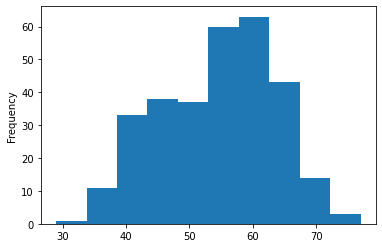

In [37]:
## Check age distribution

df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp: chest pain type
* 1: typical angina
* 2: atypical angina
* 3: non-anginal pain
* 4: asymptomatic

In [39]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


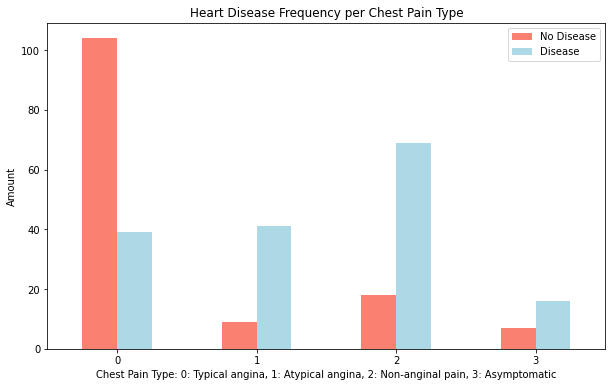

In [46]:
## Visualize the crosstab

pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

## Add labels

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type: 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [45]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


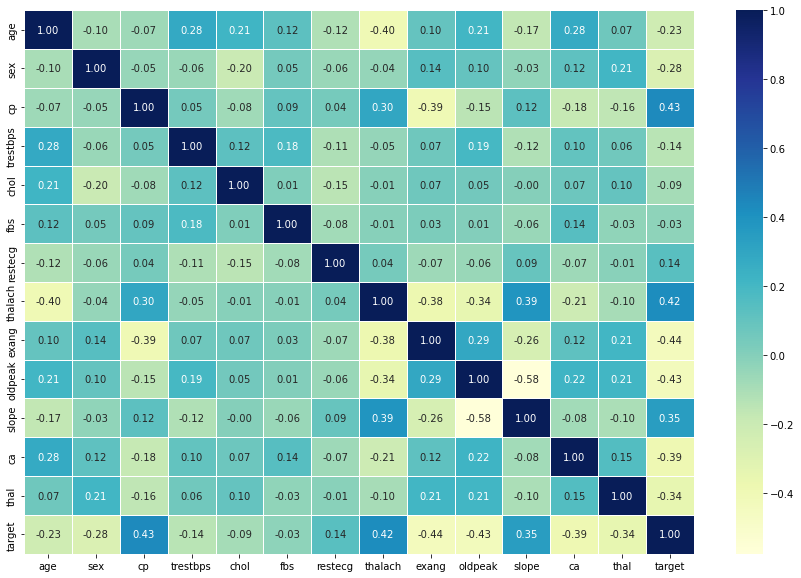

In [47]:
## Correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sx = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## 5. Modelling

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
# Split into x and y

X = df.drop("target", axis=1)
y = df["target"]

# Train test split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [54]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

After splitting the dataset, ML model is generated.

Training set is used to generate the model by creating a pattern based on the set.

Test set is used to determine whether the model is good or not.

Three models are used:
1. Logistic Regression
2. KNN
3. Random Forest Classifier

In [60]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates models
    models: dictionary of different ML models
    """

    # Set random seed
    np.random.seed(42)
    
    # Dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [61]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

D:\Kerja\YummyCorp\Materials\Heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

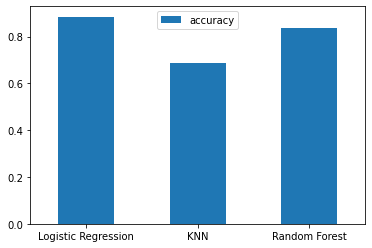

In [64]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

After getting the baseline models, we need to take a look at certain things to potentially improve our model's performane:

* Hyperparameter tuning
* Feture importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* AUC

### Hyperparameter Tuning

In [75]:
# KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours

neighbors = range(1, 21)

# Setup KNN instance

knn = KNeighborsClassifier()

# Loop through different k_neighbours values

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit algorithm
    knn.fit(X_train, y_train)
    
    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update test scores list
    test_scores.append(knn.score(X_test, y_test))

In [76]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [77]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


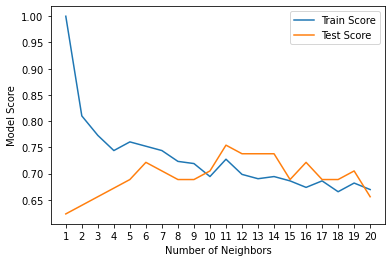

In [80]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparameter Tuning Using RandomizedSearchCV

In [81]:
# Create a hyperparameter grid for logistic regression

log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for random forest classifier

rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Tune the previously created hyperparameter grids using RandomizedSearchCV

In [84]:
# Tune logistic regression

np.random.seed(42)

# Setup random hyperparameter search for logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit the search model for logistic regression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [85]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [86]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Do the same for RandomForestClassifier()

In [87]:
# Set random seed

np.random.seed(42)

# Setup random hyperparameter for random forest classifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit the search model for random forest classifier

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [88]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [90]:
rs_rf.score(X_test, y_test)

0.819672131147541

## Tuning Hyperparameters Using GridSearchCV

Try to improve the performance again using GridSearchCV

In [91]:
# Different hyperparameters for logistic regression

log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter for logistic regression

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit the search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [92]:
# Chek the best

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [93]:
# Evaluate

gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating The Classifier Using Other Metrics

* ROC curve under AUC
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [94]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

D:\Kerja\YummyCorp\Materials\Heart_disease_project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


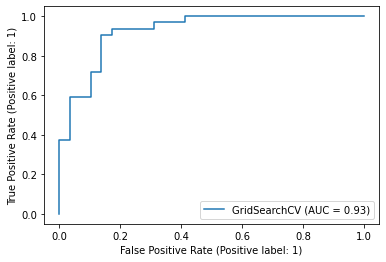

In [96]:
# Plot ROC and calculate AUC

plot_roc_curve(gs_log_reg,X_test, y_test);

In [97]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


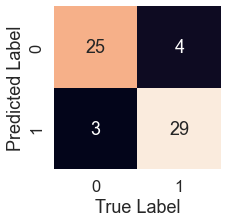

In [99]:
# Visualize the matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a better confusion matrix using heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(y_test, y_preds)

Get classification report, cross-validated precision, recall, and f1 scor

In [101]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate Evaluation Metrics Using Cross-Val

Using `cross_val_score()`

In [115]:
# Check for best hyperparameters

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [116]:
# Create new classifiers

clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [117]:
# Cross-validated accuracy

cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [118]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [119]:
# Cross-validated precision

cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [120]:
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [121]:
# Cross-validated recall

cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [122]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [123]:
# Cross-validated f1 score

cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [124]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

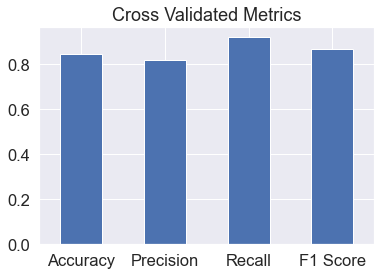

In [126]:
# Visualize all the metrics

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_recall,
                           "F1 Score": cv_f1},
                           index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Metrics",
                      legend=False)

plt.xticks(rotation=0);

### Feature Importance

Selecting the most "important" features on the dataset (features that contributed to the model better)

The methods differs between ML models.

In [127]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [128]:
# Fit an instance of logistic regression

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [130]:
clf = LogisticRegression(C= 0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [131]:
# Check coef_

clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [132]:
# Match coef's of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

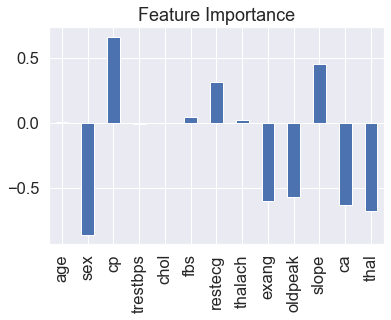

In [134]:
# Visualize the feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [ ]:
## Find out whether the correlation is correct or not

In [138]:
# Since the 'sex' feature has negative coef, 
# as the value increase it will decrease the ratio of 'target'

pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [139]:
# Since the 'slope' feature has positive coef
# as the value increase it will also increase the ratio of target

pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If the target hasn't been achieved yet, consider

* Collect more data
* Try other model
* Try to improve current model further

If the target has been achieved, consider how to present it to others